<p><img alt="DataOwl" width=150 src="http://gwsolutions.cl/Images/dataowl.png", align="left", hspace=0, vspace=5></p>

<h1 align="center">¿Qué podemos decir del COVID-19?</h1>

<h4 align="center">Modelo para documentación</h4>
<pre><div align="center"> La idea de este notebook es que pueda ser útil a la hora de guiarse para documentar un proyecto. </div>


<div align="right"> En términos de código y estructura, este notebook esta basado en el notebook de 
<a href="https://www.kaggle.com/tarunkr">Tarun Kumar</a> llamado <a href="https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons/notebook"><i>"COVID-19 Case Study - Analysis, Viz & Comparisons"</i></a>, y el de 
<a href="https://www.kaggle.com/saga21">Patrick Sanchez</a> llamado <a href="https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions"><i>"COVID Global Forecast: SIR model + ML regressions"</i></a>.
.</div></pre>

<h2>Fases CRISP-DM</h2>

<div class="alert alert-danger" role="alert">
<ol>
    <li><a href="#section1"> Entendiendo del problema</a></li>
    <li><a href="#section2"> Entendiendo los datos </a></li>
    <li><a href="#section3"> Procesando los datos </a></li>
    <li><a href="#section4"> Modelos</a></li>
    <li><a href="#section5"> Evaluación del proceso </a></li>
    <li><a href="#section6"> Reporte final </a></li>
</ol>
</div>
<hr>

<a id="section1"></a>
<h2>1. Entendiendo el problema</h2>
<hr>
<img src="http://portal21.com.ar/wp-content/uploads/2020/03/descarga.jpeg" class="rounded float-left", width=600, align="center">
<hr>

Buscamos realizar un análisis en torno a la evolución del CoronaVirus, junto con pronosticar su comportamiento en el mundo, tanto globalmente como por países. El objetivo general es lograr comprender de mejor manera como ha evolucionado esta pandemia.

Si evaluamos el contexto para realizar este análisis, podemos ver que disponemos de muchisima información y bases de datos para trabajar, entre ellas la base  de <a href="https://github.com/owid/covid-19-data">Our World in Data</a> con tablas ordenadas de la evolucion del COVID en el mundo, o la base del <a href="https://github.com/MinCiencia/Datos-COVID19">Ministerio de Ciencia y Tecnología</a>, con datos más especificos de la evolución en el país.

Utilizaremos modelos matemáticos y predictivos para obtener una tendencia de lo que podría ocurrir en los próximos días,  además de una exploración analítica de las variables previa para generar insights de valor.

Utilizaremos Python para todo el desarrollo del código tanto en preprocesamiento, como análisis y modelamiento, y en la fase final de entrega se utilizaran ademas otras herramientas como Microsoft PowerPoint y Google DataStudio.


In [93]:
#Librerías a utilizar durante todo el proyecto

import numpy as np                                                    # Numpy: 
import pandas as pd                                                   # Pandas: 
from scipy import integrate, optimize                                 # Scipy:
from scipy.interpolate import make_interp_spline, BSpline

import matplotlib.pyplot as plt                                       # Matplotlib:
from matplotlib import ticker 
import plotly.express as px                                           # Plotly
import seaborn as sns                                                 # Seaborn:
import folium                                                         # folium:
import branca                                                         # Branca:
import calmap                                                         # Calmap:

import pycountry_convert as pc

from sklearn import preprocessing                                     # SKLearn:

import time                                                           # time:
from datetime import datetime, timedelta,date                         # datetime:
import warnings                                                       # warnings:
import json                                                           # json:
import requests                                                       # requests:

from keras.layers import Input, Dense, Activation, LeakyReLU          # Keras: Librería para Red Neuronal
from keras import models
from keras.optimizers import RMSprop, Adam
              

warnings.filterwarnings('ignore')                                     
%matplotlib inline   

<a id="section2"></a><a id="section3"></a>
<h2>2-3. Entendiendo y Procesando los datos</h2>
<hr>
La etapa 2 y 3 de la metodología CRISP-DM van iterandose constantemente, puesto que a medida uno va explorando los datos, se da cuenta que necesita ajustarlos o limpiarlos, de manera que la exploración más profunda le resulte más sencilla.

La base de datos que utilizaremos será el repositorio: <a href="https://github.com/CSSEGISandData/COVID-19">2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE</a>

Utilizaremos cuatro archivos .csv de este repositorio para realizar el análisis:
<ol>
    <li><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"><b>time_series_covid19_confirmed_global.csv</b></a></li>
    <li><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"><b>time_series_covid19_deaths_global.csv</b></a></li>
    <li><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"><b>cases_country.csv</b></a></li>
    <li><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv"><b>cases_time.csv</b></a></li>
</ol>


In [99]:
# Recopilando los datos

df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [107]:
# Entendiendo los datos
# Correr de 1 linea


#df_covid19
#df_covid19.describe()
#df_covid19.columns
#df_covid19["Country_Region"].unique()
#df_confirmed
#df_confirmed.describe()
#df_confirmed.columns
#df_deaths
#df_deaths.describe()
#df_deaths.columns
#df_table
#df_table.describe()
#df_table.columns

Habiendo observado los datos, se deben tomar decisiones de preprocesamiento para posteriormente trabajar estos con mayor facilidad. Una de las decisiones que se tomó para este set es editar los datos y renombrar algunos países, para que fueran compatibles con la librería pycountry_convert.

Otra decisión de preprocesamiento fue llenar los missings con strings vaciós o 0 dependiendo del caso.

Para esto hay que hacer una visualización exhaustiva de los datos, y se van elaborando las decisiones para la modificación, eliminacion y tratamiento de la data iterativamente.

In [106]:
# Preprocesamiento de datos



# Quitamos columnas que no usaremos

df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)


# Renombramos las columnas a variables mas cortas
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]


# Cambiamos los nombres de los paises al formato que reconoce la librería pycountry_convert
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"


df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"


df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"


df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"


df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"


df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['country'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"


df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"


df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['country'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"


df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['country'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"


# Generamos un arreglo con los países
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Generamos un diccionario con los códigos de continente
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Función que convierte string continente a código continente
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

# Generando columna para codigo de continente
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])  

# Eliminamos regiones que no nos interesa analizar
df_table = df_table[df_table["continent"] != "Others"]

# Cambiamos nulos por strings vacíos
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

In [83]:
# Funciones construidas para el reporte
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

Las siguientes lineas de codigo son para generar tablas de datos mas cortas, agrupadas por país y por continente.

In [67]:
# Tablas Agrupadas

# Se genera una tabla de casos por países
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

# Se genera una tabla de casos por continentes
df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

#Se llenan los missings con 0
df_countries_cases.fillna(0,inplace=True)
df_continents_cases.fillna(0,inplace=True)

## Análisis de Datos
Para darnos una visión global de lo que ocurre, veamos el agregado de casos en todo el mundo.

In [68]:
# Visualización de una tabla con los datos totales
df_t = pd.DataFrame(pd.to_numeric(df_countries_cases.sum()),dtype=np.float64).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t.style.background_gradient(cmap='Wistia',axis=1).format("{:.0f}",subset=["Confirmed"])

Ahora que ya tenemos una visión global, podemos realizar una apertura por continente, en donde vemos que <b>Europa</b> y <b>Norteamérica</b> son los continentes con mas casos confirmados, seguidos por <b>Asia</b> y <b>Sudamérica</b>.

In [69]:
# Visualización de una tabla agrupada por continente
df_continents_cases["Mortality Rate (per 100)"] = np.round(100*df_continents_cases["Deaths"]/df_continents_cases["Confirmed"],2)
df_continents_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])

Abriendo ahora por países, es notoria la crísis que hay en <b>Estados Unidos</b> si análizamos el número absoluto de casos confirmados.

In [70]:
#Visualización de una tabla agrupada por países
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])

Es mucho más impresionante visualizar gráficamente cuanto más se ha expandido la pandemia en <b>Estados Unidos</b>, siendo superior en todas las variables. Un caso a observar es <b>Rusia</b>, que si bien es el segundo país con más casos confirmados, no aparece en el top 10 de muertes en el país, lo que nos puede hacer inferir que la enfermedad recien se empezo a propagar o ha sido combatida de manera constante. Notar también que <b>Alemania</b> es el país con más recuperados luego de <b>Estados Unidos</b>, por lo que se podría inferir que sus políticas públicas en el area de la salud estan siendo efectivas.

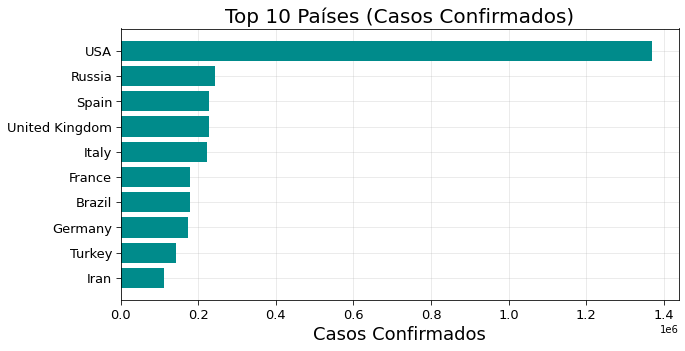

In [71]:
# Gráfico top 10 para los casos confirmados
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Casos Confirmados",fontsize=18)
plt.title("Top 10 Países (Casos Confirmados)",fontsize=20)
plt.grid(alpha=0.3)


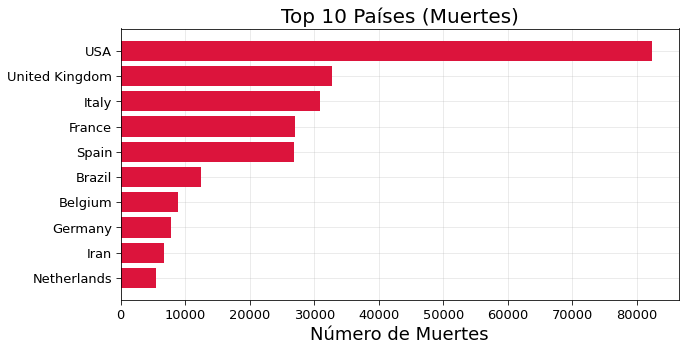

In [72]:
#Gráfico top 10 para el número de muertes
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Número de Muertes",fontsize=18)
plt.title("Top 10 Países (Muertes)",fontsize=20)
plt.grid(alpha=0.3,which='both')

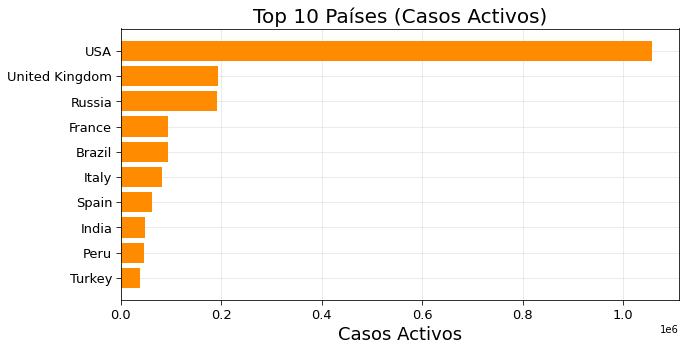

In [73]:
# Gráfico top 10 para los casos activos
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Active')["Active"].index[-10:],df_countries_cases.sort_values('Active')["Active"].values[-10:],color="darkorange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Casos Activos",fontsize=18)
plt.title("Top 10 Países (Casos Activos)",fontsize=20)
plt.grid(alpha=0.3,which='both')

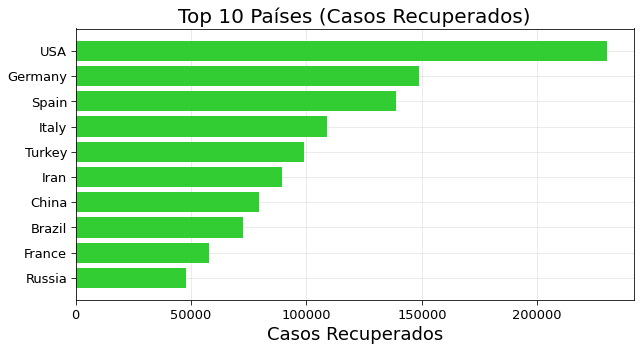

In [74]:
# Gráfico top 10 para los casos recuperados
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="limegreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Casos Recuperados",fontsize=18)
plt.title("Top 10 Países (Casos Recuperados)",fontsize=20)
plt.grid(alpha=0.3,which='both')

Las visualizaciones geoespaciales del Coronavirus que más se han viralizado son como las del siguiente mapa, no obstante a cuando observamos a distancia no se aprecian bien los círculos en zonas con muchos países.

In [75]:
# Gráfico del COVID en mapa
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

No obstante, si analizamos más en detalle la evolución del COVID-19 en el mismo tipo de mapa podemos notar que desde el 22 de Enero hasta el 22 de Febrero la expansión no era notoria, más bien solo se propagaba por China; 3 semanas tardo en consumir Europa, y en tan solo 15 días se propago tanto en América del Sur como en América del Norte.


In [79]:
# Gráfico de expansión del COVID 19 en mapa
df_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths'].max().reset_index().fillna(0)
df_data["Last_Update"] = pd.to_datetime( df_data["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(df_data, locations="Country_Region", locationmode='country names', 
                     color=np.power(df_data["Confirmed"],0.3)-2 , size= np.power(df_data["Confirmed"]+1,0.3)-1, hover_name="Country_Region",
                     hover_data=["Confirmed"],
                     range_color= [0, max(np.power(df_data["Confirmed"],0.3))], 
                     projection="natural earth", animation_frame="Last_Update", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='COVID-19: Avance de la infección'
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.show()

Mirando ahora la serie temporal de países infectados alrededor del mundo, notamos que desde el 22 de Enero hasta el 22 de ebrero habían cerca de 35 países infectados solamente; luego en un mes esta cifra llego a mas de 150, para luego crecer de a poco en los países restantes.

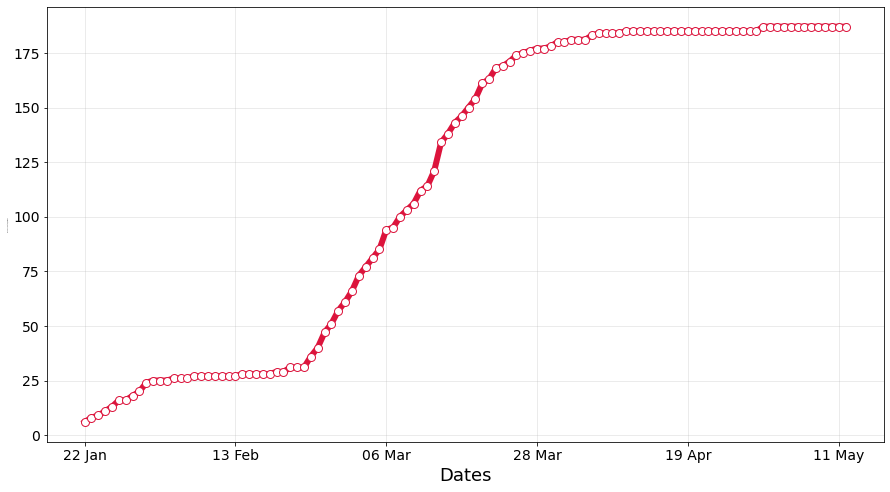

In [81]:
# Serie temporal países infectados

case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=1)
plt.grid(alpha = 0.3)

plt.show()
plt.close()

Como se ve en el siguiente gráfico que superpone los casos confirmados con las muertes, existen dos tendencias que a priori parecen disintas, no obstante no se puede asegurar esto si no las analizamos localmente.

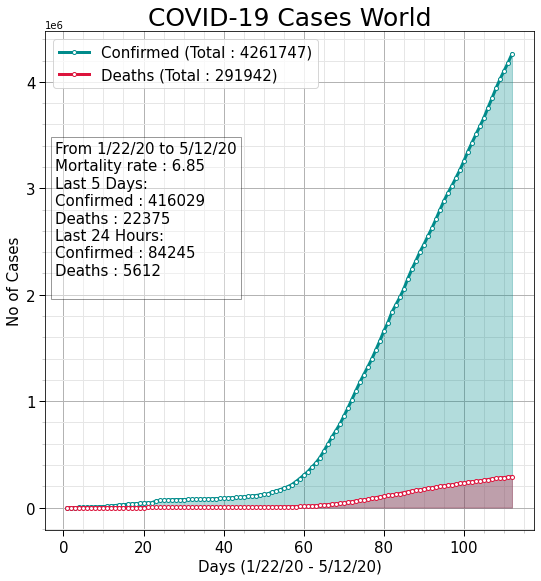

In [86]:
# Series temporales superpuestas: Confirmados sobre Muertes en el mundo
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))

visualize_covid_cases(df_confirmed, df_deaths,continent = "All",figure = [f,rows,cols, 1])

plt.show()

Abrimos por continente.

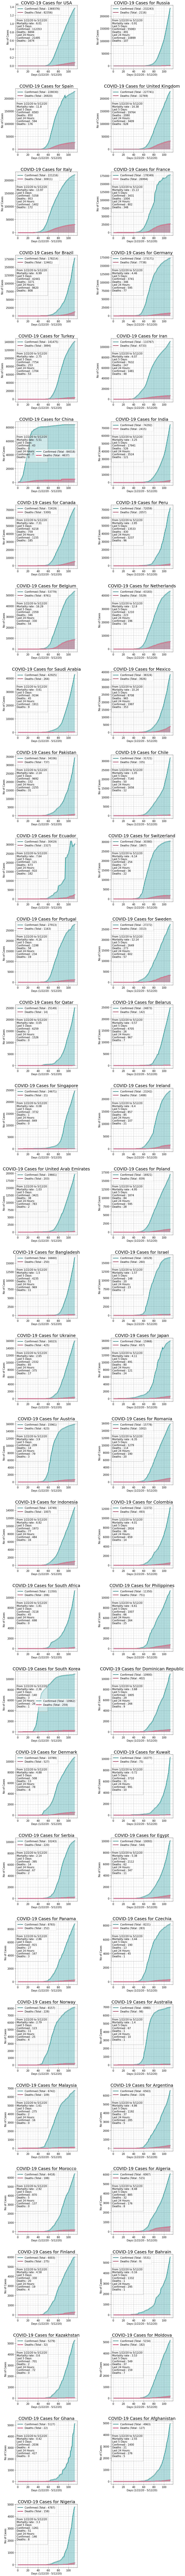

In [88]:
# Series temporales superpuestas: Confirmados sobre Muertes grupo países
df_countries = df_confirmed.groupby(["country"]).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending = False)
countries = df_countries[df_countries[df_countries.columns[-1]] >= 4000].index

cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(18,7*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed, df_deaths,country = country,figure = [f,rows,cols, i+1])

plt.show()

Ahora por país

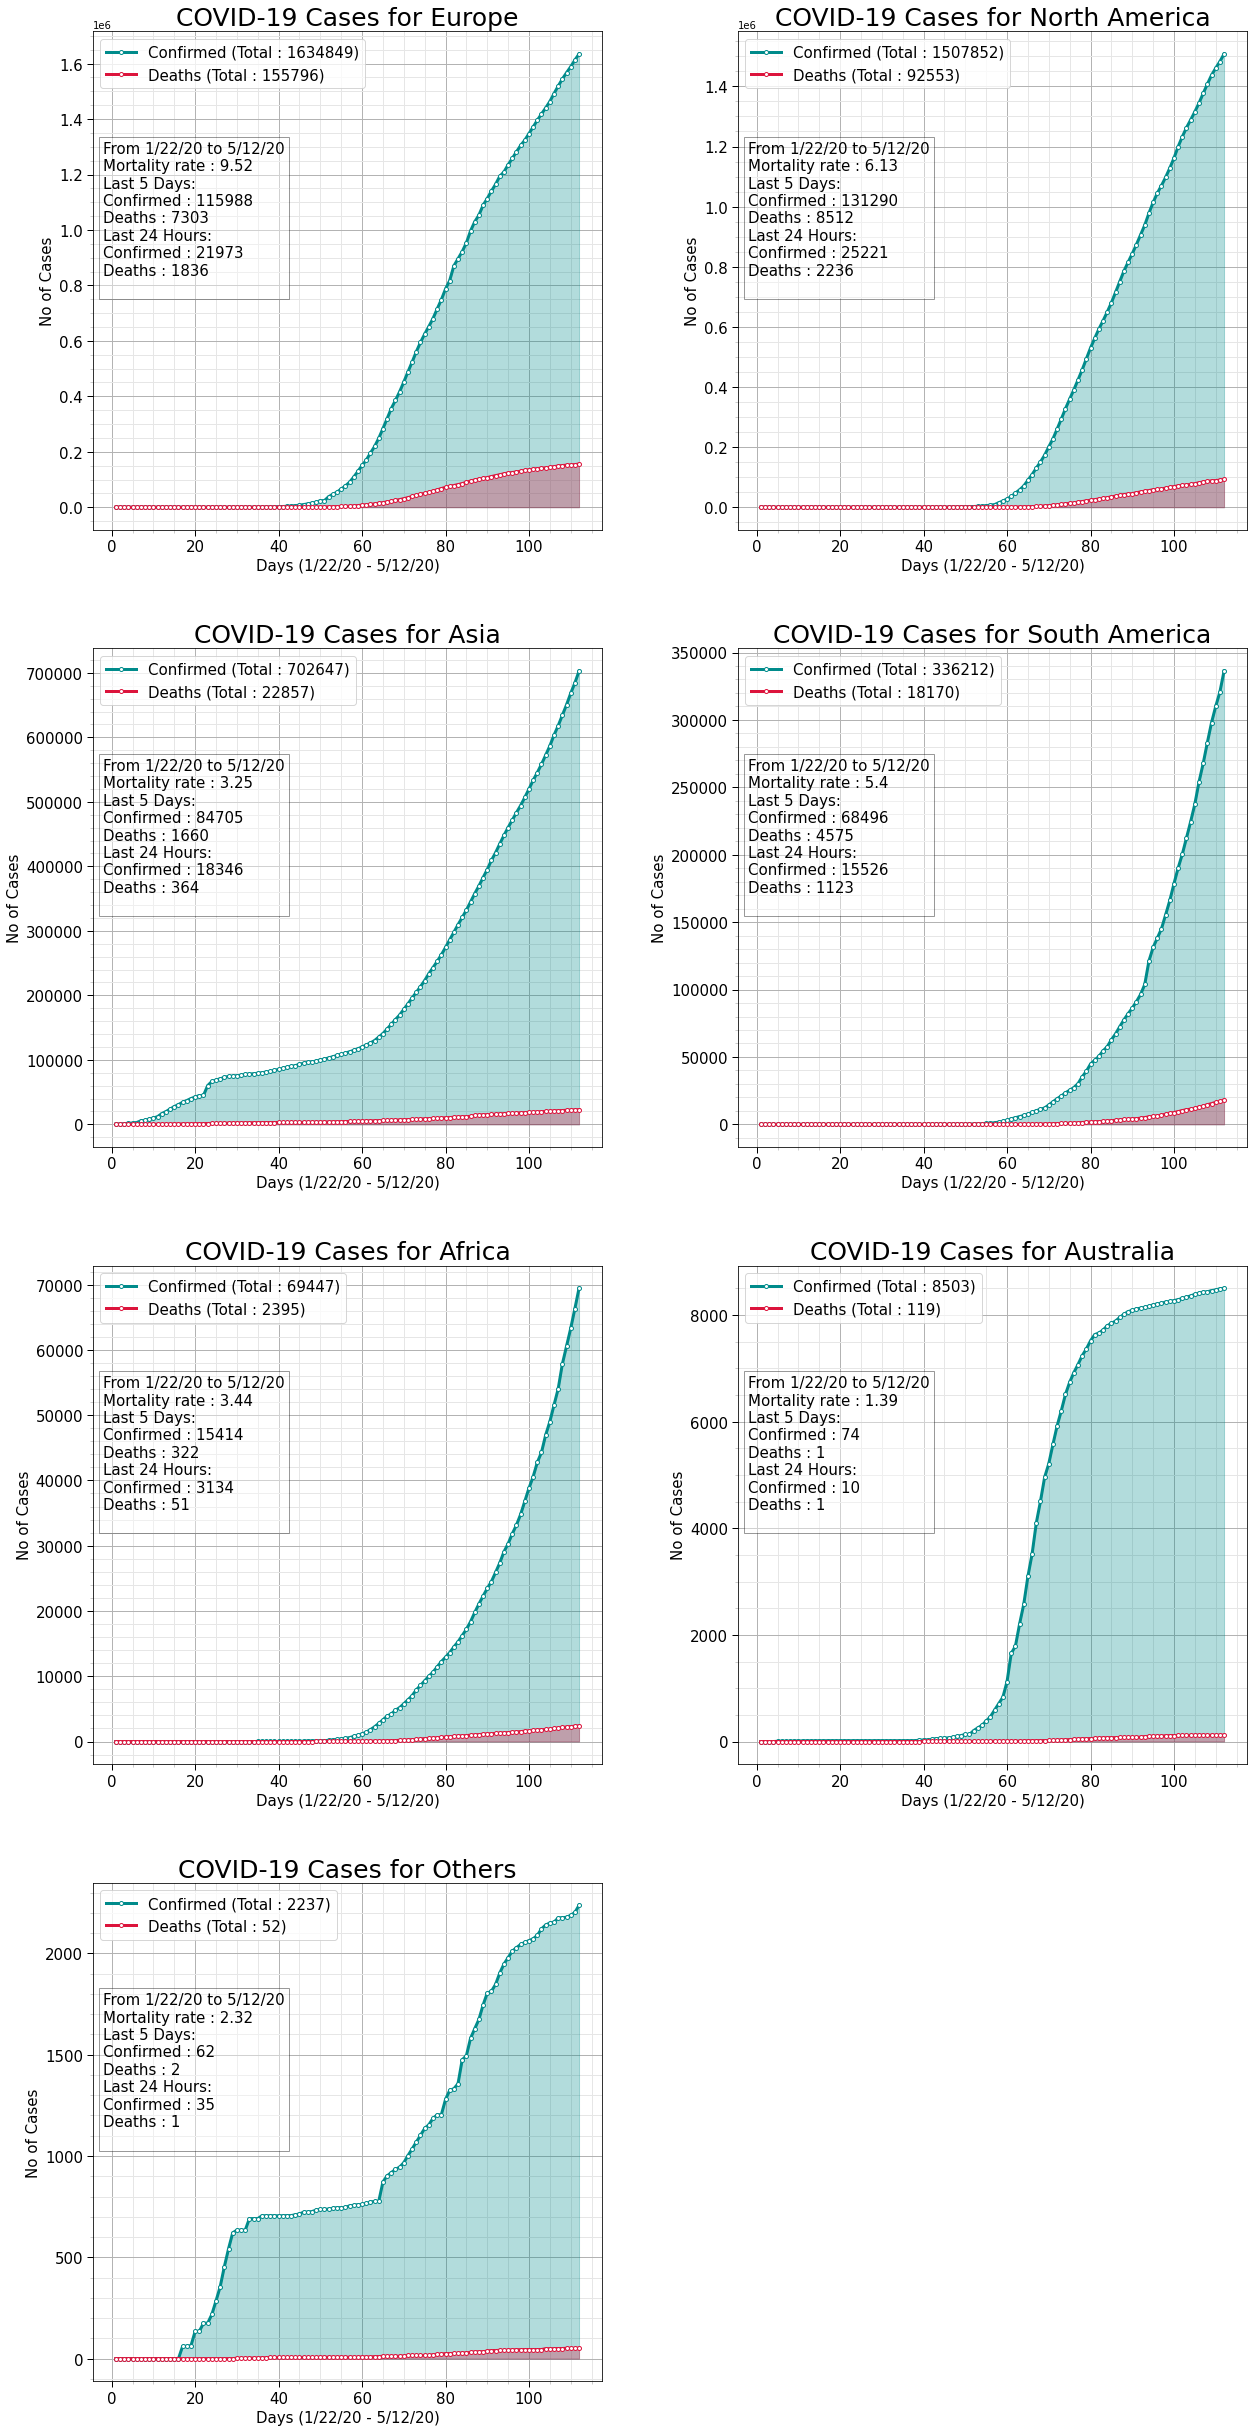

In [87]:
# Series temporales superpuestas: Confirmados sobre Muertes grupo Continente
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index

cols =2
rows = int(np.ceil(continents.shape[0]/cols))
f = plt.figure(figsize=(20,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(df_confirmed, df_deaths, continent = continent,figure = [f,rows,cols, i+1])

plt.show()


Por último, podemos ver que el comportamiento es similar para el crecimiento de casos confirmados en casi todos los países observados, diferenciandose solamente en el tiempo de duplicación de casos.

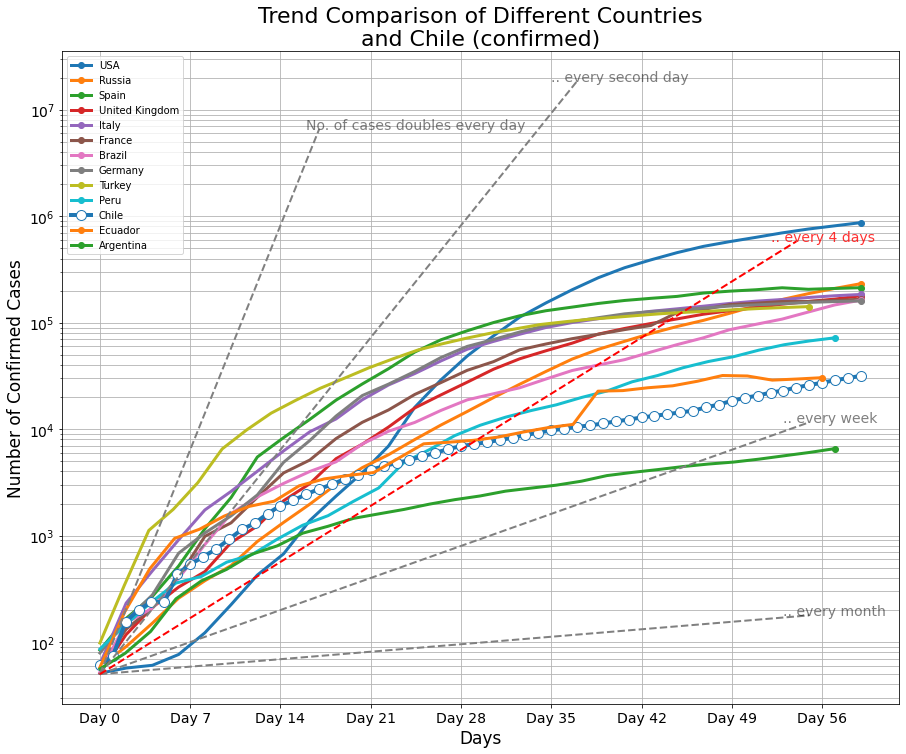

In [90]:
# Gráfico comparativo Chile vs otros Países, Casos Confirmados en Escala Logaritmica

temp = df_confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(15,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 9:
        if country != "Chile" and country != "Argentina" and country != "Peru" and country != "Ecuador":
            continue
    days = 60
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    if country != "Chile":
        plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
        plt.plot(date,t,"-.",label = country,**marker_style)

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,days,7),[ "Day "+str(i) for i in range(days)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,int(days-22))
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every second day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,int(days-4))
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,int(days-4))
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,int(days-5))
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),color="Red",xycoords="data",fontsize=14,alpha = 0.8)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Countries\n and Chile (confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.show()

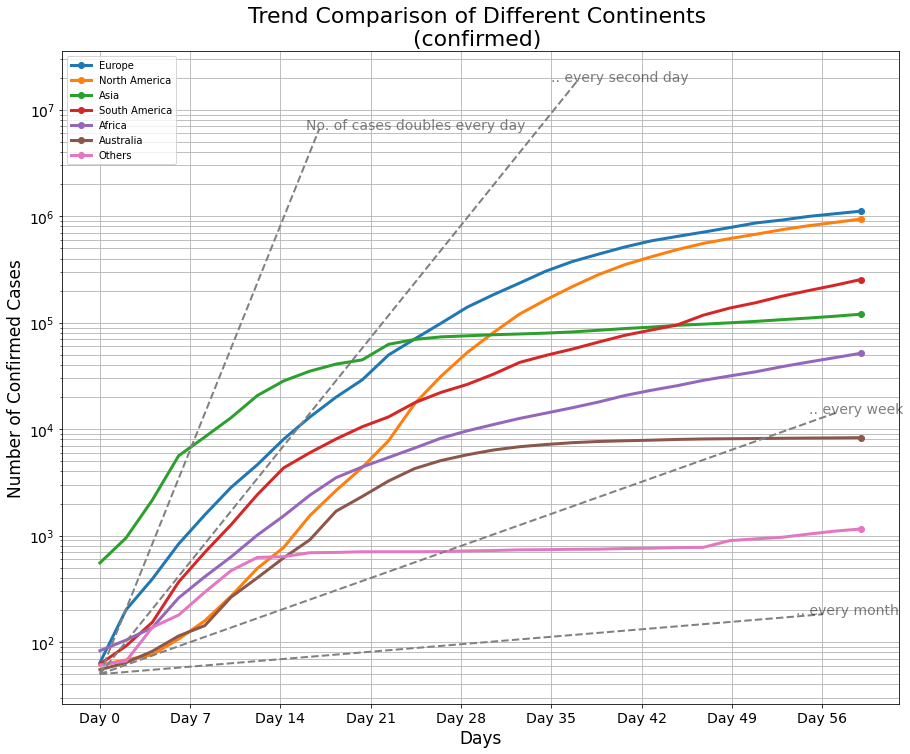

In [91]:
# Gráfico comparativo Continentes, Casos Confirmados (Escala Logaritmica)
temp = df_confirmed.groupby('continent').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(15,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 10:
        break
    days = 60
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,days,7),[ "Day "+str(i) for i in range(days)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,days-22)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every second day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,days-2)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,days-3)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Continents \n(confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.show()

<a id="section4"></a>
<h2>4. Modelos </h2>
<hr>

<a id="section5"></a>
<h2>5. Evaluación </h2>
<hr>

<a id="section6"></a>
<h2>6. Reporte final </h2>
<hr>